### Introduction to DataWrangling with Pandas: the Python Data Analysis library
Pandas is a strange name, kind of an acronym: Python, Numerical, Data Analysis? 

(or so I thought, seems the name comes from Panel Data, either way, nothing to do with Chinese bamboo chewing bears)

Because pandas is an external library you need to import it. There are several ways that you will see imports done:
* import pandas
* from pandas import tools
* import pandas as pd


The first is the same as 'from pandas import *' where star means all (that's right, the same as SQL)<br>
The second imports a part of pandas only, a sublibrary called 'tools'<br>
The third is a renaming, or alias, 'pd' is common (you could call pandas 'xyz' but you'd be on your own).<br>
You could leave out the 'import as' and just type 'pandas' every time but it becomes more useful for longer names e.g.<br>
import matplotlib.pyplot as plt 

So, for any code following (if the above imports work), 'plt' would mean 'matplotlib.pyplot'

This, by the way, is a Python Notebook, select cells (this one is text, below is code) then SHIFT-ENTER to run sequentially

The following scripts should work with both Python2 and Python 3!

In [1]:
# import libraries first
import pandas as pd 
import numpy as np # Numberical Python

In [2]:
# and make one of these dataframes...
dataframe()

NameError: name 'dataframe' is not defined

In [3]:
# oops, try another spelling
Dataframe()

NameError: name 'Dataframe' is not defined

In [4]:
# no good? Try the library
pd.dataframe()

AttributeError: 'module' object has no attribute 'dataframe'

## Errors
<font color = "green">'module' object has no attribute 'dataframe'<br></font>
is better than<br>
<font color = "green">name 'Dataframe' is not defined<br></font>
but neither are working...

## Tip
When writing code you can use a help feature that shows you options. <br>
If you type e.g. 'pandas.' then TAB you can see options:

<img src = "TABhelp.png" height = "200" width = "200">

There's also
* ??pandas
* help(pandas)
* pandas?

In [5]:
# so try pandas.DataFrame()
pd.DataFrame()

""


So.. no errors, seems to have worked, but what's in the DataFrame? (nothing)
#### Make a note, Python is case sensitive: 'DataFrame' is not the same as 'Dataframe' or 'dataframe'

In [6]:
pd.DataFrame([2,4,6,8])

,0
0,2
1,4
2,6
3,8


In [7]:
# aha, better but this is temporary, if you want to use the data you need to save it, so create a variable
df = pd.DataFrame([2,4,6,8])

In [8]:
# but now there's no output... can't win
# use the variable to see the data
df 

,0
0,2
1,4
2,6
3,8


Make another note, the column titles are ' ' and '0'

And another note: Python is one of those '0' index languages, we have 4 items (2,4,6,8) but they are found at 0,1,2,3 viz: 

In [9]:
df.columns.name = "Index" # rename the column
df

Index,0
0,2
1,4
2,6
3,8


In [10]:
# you can see this another way:
df[0][1] # column 0, item 1 

4

In [11]:
# You can also use pandas to create an series of datetime objects. Let's make one for the week beginning January 25th, 2015:
dates = pd.date_range('20150125', periods=7)

In [12]:
dates

DatetimeIndex(['2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

Now we'll create a DataFrame using the dates array as our index, fill it with some random values using numpy, and give the columns some labels.

Note that randn(7,5) below matches the 7 dates (rows) and 5 names (columns)

(Otherwise it wouldn't work, try changing 5 to 6...)

In [13]:
df = pd.DataFrame(np.random.randn(7,5), index=dates, columns={'Adam','Bob','Carla','Dave','Eve'})

In [14]:
df

,Eve,Bob,Adam,Carla,Dave
2015-01-25,-1.858670,0.453447,-0.135654,2.362819,-0.333667
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.264890
2015-01-31,1.330310,-0.282663,1.839849,1.839197,-2.399729


DataFrames are more flexible than that, both in terms of what you can store in them and what you can do with them.

It can also be useful to know how to create a DataFrame from a dict of objects. 

This comes in particularly handy when working with JSON-like structures.

In [15]:
df2 = pd.DataFrame({ 'A' : np.random.random_sample(4), # 4 random numbers
                     'B' : pd.Timestamp('20130102'), # 4 dates, note pandas autofills
                     'C' : pd.date_range('20150125',periods = 4), # 4 dates in a range
                     'D' : ['a','b','c','d'], # letters
                     'E' : ["cat","dog","mouse","parrot"], # text/string
                     'F' : 'copy'}) # note pandas autofills

In [16]:
df2

,A,B,C,D,E,F
0,0.432025,2013-01-02,2015-01-25,a,cat,copy
1,0.375655,2013-01-02,2015-01-26,b,dog,copy
2,0.598711,2013-01-02,2015-01-27,c,mouse,copy
3,0.922375,2013-01-02,2015-01-28,d,parrot,copy


## Exploring the data in a DataFrame

We can access the data types of each column in a DataFrame as follows:

In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C    datetime64[ns]
D            object
E            object
F            object
dtype: object

So numbers, dates, objects all cohabitating in a dataframe.

We can display the index, columns, and the underlying numpy data separately:

In [18]:
df2.index

RangeIndex(start=0, stop=4, step=1)

In [19]:
df2.columns

Index([u'A', u'B', u'C', u'D', u'E', u'F'], dtype='object')

In [20]:
df2.values

array([[0.4320251193207445, Timestamp('2013-01-02 00:00:00'),
        Timestamp('2015-01-25 00:00:00'), 'a', 'cat', 'copy'],
       [0.37565511384520744, Timestamp('2013-01-02 00:00:00'),
        Timestamp('2015-01-26 00:00:00'), 'b', 'dog', 'copy'],
       [0.5987112819297318, Timestamp('2013-01-02 00:00:00'),
        Timestamp('2015-01-27 00:00:00'), 'c', 'mouse', 'copy'],
       [0.9223753756742116, Timestamp('2013-01-02 00:00:00'),
        Timestamp('2015-01-28 00:00:00'), 'd', 'parrot', 'copy']], dtype=object)

To get a quick statistical summary of your data, use the describe() function:

In [21]:
df2.describe()

,A
count,4.000000
mean,0.582192
std,0.245768
min,0.375655
25%,0.417933
50%,0.515368
75%,0.679627
max,0.922375


## Some basic data transformations

DataFrames have a built-in transpose:

In [22]:
df2.T

,0,1,2,3
A,0.432025,0.375655,0.598711,0.922375
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,2015-01-25 00:00:00,2015-01-26 00:00:00,2015-01-27 00:00:00,2015-01-28 00:00:00
D,a,b,c,d
E,cat,dog,mouse,parrot
F,copy,copy,copy,copy


We can also sort a DataFrame along a given data dimension. For example, we might want to sort by the values in column B:

In [23]:
df.sort_values(by='Bob')

,Eve,Bob,Adam,Carla,Dave
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814
2015-01-31,1.330310,-0.282663,1.839849,1.839197,-2.399729
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.264890
2015-01-25,-1.858670,0.453447,-0.135654,2.362819,-0.333667
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351


## Selection

To select only only the first few rows of a DataFrame, use the head()function

In [24]:
df.head()

,Eve,Bob,Adam,Carla,Dave
2015-01-25,-1.858670,0.453447,-0.135654,2.362819,-0.333667
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351


To view only the last few rows, use the tail() function. Note that by default, both head() and tail() return 5 rows. 
You can also specify the number you want by passing in an integer.

In [25]:
df.tail(2)

,Eve,Bob,Adam,Carla,Dave
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.264890
2015-01-31,1.330310,-0.282663,1.839849,1.839197,-2.399729


Selecting a single column:

In [26]:
df['Dave']

2015-01-25   -0.333667
2015-01-26   -1.097814
2015-01-27   -1.253980
2015-01-28    0.186880
2015-01-29   -0.051351
2015-01-30    0.264890
2015-01-31   -2.399729
Freq: D, Name: Dave, dtype: float64

We can also select a subset of the rows using slicing. You can select either by integer indexing:

In [27]:
df[1:3]

,Eve,Bob,Adam,Carla,Dave
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980


Or by value (for example, slicing on a date range might come in handy):

In [28]:
df['20150127':'20150129']

,Eve,Bob,Adam,Carla,Dave
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351


To select more than one column at a time, try loc[]:

In [29]:
df.loc[:,['Dave','Eve']]

,Dave,Eve
2015-01-25,-0.333667,-1.858670
2015-01-26,-1.097814,0.021725
2015-01-27,-1.253980,0.150366
2015-01-28,0.186880,1.598294
2015-01-29,-0.051351,0.418208
2015-01-30,0.264890,0.325039
2015-01-31,-2.399729,1.330310


And of course, you might want to do both at the same time:

In [30]:
df.loc['20150127':'20150129',['Dave','Eve']]

,Dave,Eve
2015-01-27,-1.253980,0.150366
2015-01-28,0.186880,1.598294
2015-01-29,-0.051351,0.418208


## Conditional Indexing
Sometimes it's useful to be able to select all rows that meet some criteria. 
For example, we might want all rows where the value is greater than 0:

In [31]:
df[df['Eve'] > 0]

,Eve,Bob,Adam,Carla,Dave
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.264890
2015-01-31,1.330310,-0.282663,1.839849,1.839197,-2.399729


Or perhaps we'd like to eliminate all negative values:

In [32]:
nonneg_only = df[df > 0]

In [33]:
nonneg_only

,Eve,Bob,Adam,Carla,Dave
2015-01-25,NaN,0.453447,NaN,2.362819,NaN
2015-01-26,0.021725,NaN,NaN,NaN,NaN
2015-01-27,0.150366,NaN,1.103976,NaN,NaN
2015-01-28,1.598294,NaN,NaN,NaN,0.18688
2015-01-29,0.418208,2.243459,1.003675,1.431892,NaN
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.26489
2015-01-31,1.330310,NaN,1.839849,1.839197,NaN


And then maybe we'd like to drop all the rows with missing values:

In [34]:
nonneg_only.dropna()

,Eve,Bob,Adam,Carla,Dave
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.26489


Oops... maybe not. How about we set them to zero instead?

In [35]:
nonneg_only.fillna(value=0)

,Eve,Bob,Adam,Carla,Dave
2015-01-25,0.000000,0.453447,0.000000,2.362819,0.00000
2015-01-26,0.021725,0.000000,0.000000,0.000000,0.00000
2015-01-27,0.150366,0.000000,1.103976,0.000000,0.00000
2015-01-28,1.598294,0.000000,0.000000,0.000000,0.18688
2015-01-29,0.418208,2.243459,1.003675,1.431892,0.00000
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.26489
2015-01-31,1.330310,0.000000,1.839849,1.839197,0.00000


But what if your values aren't numeric? No problem, we can also do filtering. First, let's copy the DataFrame and add a new column of nominal values:

In [36]:
df2 = df.copy()

In [37]:
df2['color']=['blue', 'green','red','blue','green','red','blue']

In [38]:
df2

,Eve,Bob,Adam,Carla,Dave,color
2015-01-25,-1.858670,0.453447,-0.135654,2.362819,-0.333667,blue
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814,green
2015-01-27,0.150366,-1.383607,1.103976,-1.740274,-1.253980,red
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880,blue
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351,green
2015-01-30,0.325039,0.341283,0.642078,1.364018,0.264890,red
2015-01-31,1.330310,-0.282663,1.839849,1.839197,-2.399729,blue


Now we can use the isin() function to select only the rows with 'green' or 'blue' in the color column:

In [39]:
df2[df2['color'].isin(['green','blue'])]

,Eve,Bob,Adam,Carla,Dave,color
2015-01-25,-1.858670,0.453447,-0.135654,2.362819,-0.333667,blue
2015-01-26,0.021725,-0.839928,-0.278542,-2.227070,-1.097814,green
2015-01-28,1.598294,-2.137305,-0.641440,-0.187883,0.186880,blue
2015-01-29,0.418208,2.243459,1.003675,1.431892,-0.051351,green
2015-01-31,1.330310,-0.282663,1.839849,1.839197,-2.399729,blue


## Basic Math

It's simple to get the mean across all numeric columns:

In [40]:
df.mean()

Eve      0.283610
Bob     -0.229331
Adam     0.504849
Carla    0.406100
Dave    -0.669253
dtype: float64

We can also perform the same operation on rows:

In [41]:
df.mean(1)

2015-01-25    0.097655
2015-01-26   -0.884326
2015-01-27   -0.624704
2015-01-28   -0.236291
2015-01-29    1.009177
2015-01-30    0.587462
2015-01-31    0.465393
Freq: D, dtype: float64

Median also behaves as expected:

In [42]:
df.median()

Eve      0.325039
Bob     -0.282663
Adam     0.642078
Carla    1.364018
Dave    -0.333667
dtype: float64

You can also use the apply() function to evaluate functions to the data. For example, we might want to perform a cumulative summation (thanks, numpy!):

In [43]:
df.apply(np.cumsum)

,Eve,Bob,Adam,Carla,Dave
2015-01-25,-1.858670,0.453447,-0.135654,2.362819,-0.333667
2015-01-26,-1.836945,-0.386481,-0.414197,0.135749,-1.431481
2015-01-27,-1.686579,-1.770088,0.689779,-1.604525,-2.685461
2015-01-28,-0.088284,-3.907393,0.048339,-1.792408,-2.498581
2015-01-29,0.329923,-1.663934,1.052014,-0.360516,-2.549932
2015-01-30,0.654963,-1.322651,1.694091,1.003502,-2.285042
2015-01-31,1.985272,-1.605314,3.533941,2.842699,-4.684772


Or apply your own function, such as finding the spread (max value - min value):

In [44]:
df.apply(lambda x: x.max() - x.min())

Eve      3.456964
Bob      4.380764
Adam     2.481289
Carla    4.589889
Dave     2.664619
dtype: float64

## Combining DataFrames

Combining DataFrame objects can be done using simple concatenation (provided they have the same columns):

In [45]:
frame_one = pd.DataFrame(np.random.randn(5, 4))

In [46]:
frame_one

,0,1,2,3
0,-0.665089,-0.154235,0.184175,0.181451
1,-1.225278,-0.172902,0.197954,0.272112
2,2.925421,0.337822,1.253015,0.468237
3,0.114031,-1.591183,0.650589,0.140585
4,-0.774662,-0.746520,1.268797,-1.114560


In [47]:
frame_two = pd.DataFrame(np.random.randn(5, 4))

In [48]:
frame_two

,0,1,2,3
0,-0.232603,-1.000277,0.933792,2.243486
1,-0.814556,0.559354,0.213169,0.259058
2,-0.584893,-0.240999,-1.107272,-0.823840
3,2.243807,-1.299859,-1.546084,2.048934
4,0.699831,-0.088412,-0.910335,-0.120463


In [49]:
pd.concat([frame_one, frame_two])

,0,1,2,3
0,-0.665089,-0.154235,0.184175,0.181451
1,-1.225278,-0.172902,0.197954,0.272112
2,2.925421,0.337822,1.253015,0.468237
3,0.114031,-1.591183,0.650589,0.140585
4,-0.774662,-0.746520,1.268797,-1.114560
0,-0.232603,-1.000277,0.933792,2.243486
1,-0.814556,0.559354,0.213169,0.259058
2,-0.584893,-0.240999,-1.107272,-0.823840
3,2.243807,-1.299859,-1.546084,2.048934
4,0.699831,-0.088412,-0.910335,-0.120463


If your DataFrames do not have an identical structure, but do share a common key, you can also perform a SQL-style join using the merge() function:

In [50]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [51]:
left

,key,lval
0,foo,1
1,bar,2


In [52]:
right = pd.DataFrame({'key': ['foo', 'foo', 'bar'], 'rval': [3, 4, 5]})

In [53]:
right

,key,rval
0,foo,3
1,foo,4
2,bar,5


In [54]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,3
1,foo,1,4
2,bar,2,5


## Grouping

Sometimes when working with multivariate data, it's helpful to be able to condense the data along a certain dimension in order to perform a calculation for efficiently. Let's start by creating a messy DataFrame:

In [55]:
foo_bar = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                            'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                            'C' : np.random.randn(8),
                            'D' : np.random.randn(8)})

In [56]:
foo_bar

,A,B,C,D
0,foo,one,-1.363590,-1.008388
1,bar,one,0.467396,0.263606
2,foo,two,0.853605,-0.657834
3,bar,three,2.643535,-1.091063
4,foo,two,0.431238,1.794219
5,bar,two,1.029216,0.948158
6,foo,one,2.099840,1.455299
7,foo,three,-1.091289,-0.067751


Now let's group by column A, and sum along the other columns:

In [57]:
foo_bar.groupby('A').sum()

,C,D
A,,
bar,4.140148,0.120701
foo,0.929804,1.515546


Note that column B was dropped, because the summation operator doesn't make sense on strings. However, if we wanted to retain that information, we could perform the same operation using a hierarchical index:

In [58]:
grouped = foo_bar.groupby(['A','B']).sum()

In [59]:
grouped

C         D
A   B                        
bar one    0.467396  0.263606
    three  2.643535 -1.091063
    two    1.029216  0.948158
foo one    0.736250  0.446911
    three -1.091289 -0.067751
    two    1.284843  1.136386

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (for example, converting secondly data into minutely data). Firse, let's create an array of dateTime objects at a frequency of 1 second:

In [60]:
rng = pd.date_range('1/1/2015', periods=100, freq='S')

In [61]:
rng[1:5]  # and look at a few

DatetimeIndex(['2015-01-01 00:00:01', '2015-01-01 00:00:02',
               '2015-01-01 00:00:03', '2015-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

Now we'll use that to greate a time series, assigning a random integer to each element of the range:

In [62]:
time_series = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [63]:
time_series.head()

2015-01-01 00:00:00    230
2015-01-01 00:00:01    414
2015-01-01 00:00:02    499
2015-01-01 00:00:03    458
2015-01-01 00:00:04    316
Freq: S, dtype: int64

Next, we'll resample the data by binning the one-second raws into minutes (and summing the associated values):

In [64]:
time_series.resample('1Min').sum()

2015-01-01 00:00:00    16501
2015-01-01 00:01:00    10678
Freq: T, dtype: int64

## Reading/Writing to files

Writing to a file is straightforward:

In [65]:
foo_bar.to_csv('foo.csv')

As is reading:

In [66]:
new_frame = pd.read_csv('foo.csv')

In [67]:
new_frame.head()

,Unnamed: 0,A,B,C,D
0,0,foo,one,-1.363590,-1.008388
1,1,bar,one,0.467396,0.263606
2,2,foo,two,0.853605,-0.657834
3,3,bar,three,2.643535,-1.091063
4,4,foo,two,0.431238,1.794219


But what if the data is a little... messy? Something like this:

In [68]:
broken_df = pd.read_csv('bikes.csv', encoding='latin1')

In [69]:
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


No problem! The read_csv() function has lots of tools to help wrangle this mess. Here we'll

    - change the column separator to a ;
    - Parse the dates in the 'Date' column
    - Tell it that our dates have the date first instead of the month first
    - Set the index to be the 'Date' column


In [70]:
fixed_df = pd.read_csv('bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [71]:
fixed_df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


## Scraping data from the web

Many of you will probably be interested in scraping data from the web for your projects. For example, what if we were interested in working with some historical Canadian weather data? Well, we can get that from: http://climate.weather.gc.ca using their API. Requests are going to be formatted like this:

(Accessed on 2 August 2016)

In [84]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

Note that we've requested the data be returned as a csv, and that we're going to supply the month and year as inputs when we fire off the query. To get the data for March 2013, we need to format it with month=3, year=2012:


In [85]:
url = url_template.format(month=3, year=2012)

This is great! We can just use the same read_csv function as before, and just give it a URL as a filename. Awesome.

Upon inspection, we find out that there are 16 rows of metadata at the top of this CSV, but pandas knows CSVs are weird, so there's a skiprows options. We parse the dates again, and set 'Date/Time' to be the index column. Here's the resulting dataframe.

In [86]:
weather_mar2012 = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True, encoding='latin1')

In [87]:
weather_mar2012.head()

,Year,Month,Day,Time,Data Quality,Temp (ÃÂ°C),Temp Flag,Dew Point Temp (ÃÂ°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


As before, we can get rid of any comlumns that don't contain real data using ${\tt .dropna()}$

In [88]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')

In [89]:
weather_mar2012.head()

,Year,Month,Day,Time,Data Quality,Temp (ÃÂ°C),Dew Point Temp (ÃÂ°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,-7.8,83,35,1.6,100.62,Snow


Getting better! The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

In [90]:
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
weather_mar2012[:5]

,Temp (ÃÂ°C),Dew Point Temp (ÃÂ°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Great! Now let's figure out how to download the whole year? It would be nice if we could just send that as a single request, but like many APIs this one is limited to prevent people from hogging bandwidth. No problem: we can write a function!

In [91]:
def download_weather_month(year, month):
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

Now to test that this function does the right thing:

In [92]:
download_weather_month(2012, 1).head()

,Temp (�C),Dew Point Temp (�C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Woohoo! Now we can iteratively request all the months using a single line. This will take a little while to run.

In [93]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 12)]

Once that's done, it's easy to concatenate all the dataframes together into one big dataframe using ${\tt pandas.concat()}$. And now we have the whole year's data!

In [94]:
weather_2012 = pd.concat(data_by_month)

This thing is long, so instead of printing out the whole thing, I'm just going to print a quick summary of the ${\tt DataFrame}$ by calling ${\tt .info()}$:

In [95]:
weather_2012.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8040 entries, 2012-01-01 00:00:00 to 2012-11-30 23:00:00
Data columns (total 7 columns):
Temp (�C)              8040 non-null float64
Dew Point Temp (�C)    8040 non-null float64
Rel Hum (%)            8040 non-null int64
Wind Spd (km/h)        8040 non-null int64
Visibility (km)        8040 non-null float64
Stn Press (kPa)        8040 non-null float64
Weather                8040 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 502.5+ KB


And a quick reminder, if we wanted to save that data to a file:

In [96]:
weather_2012.to_csv('weather_2012.csv')

## And finally, something you should do early on in the wrangling process, plot data:

In [97]:
# plot that data
import matplotlib.pyplot as plt 
# so now 'plt' means matplotlib.pyplot

In [98]:
plt.plot(df)

In [99]:
# nothing to see... in iPython you need to specify where the chart will display, usually it's in a new window
# to see them 'inline' use:
%matplotlib inline

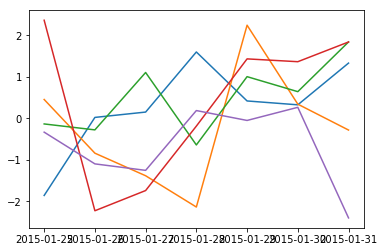

In [100]:
plt.plot(df)

In [101]:
# that's better, try other plots, scatter is popular, also boxplot

## One more example 

We are interested in getting  State and Territory information from Wikipedia, however we do not want to copy and paste the table : )

Here is the URL
https://en.wikipedia.org/wiki/States_and_territories_of_Australia  (Accessed on 10 July 2016)

We need two libraries to do the task:

Check documentations here:
* [urllib](https://docs.python.org/2/library/urllib.html)
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


In [102]:
import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen
from bs4 import BeautifulSoup

We first save the link in wiki

In [103]:
wiki = "https://en.wikipedia.org/wiki/States_and_territories_of_Australia"

Then use ulropen to open the page. 

If you get "SSL: CERTIFICATE_VERIFY_FAILED", what you need to do is find where "Install Certificates.command" file is, and click it to upgrade the certificate. Then, you should be able to solve the problem.

In [104]:
page = urlopen(wiki)

In [105]:
if sys.version_info[0] == 3:
    page = page.read()

You will meet BeautifulSoup later in this subject, so don't worry if you feel uncomfortable with it now. You can always revisit. 

We begin by reading in the source code and creating a Beautiful Soup object with the BeautifulSoup function.

In [106]:
soup = BeautifulSoup(page, "html")

/Users/dulan/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/dulan/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Then we print and see. 

In [107]:
 print (soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   States and territories of Australia - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"States_and_territories_of_Australia","wgTitle":"States and territories of Australia","wgCurRevisionId":826667720,"wgRevisionId":826667720,"wgArticleId":4689096,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Australian Statistical Geography Standard 2016 ID not in Wikidata","Australian Statistical Geography Standard 2011 ID not in Wikidata","Use dmy dates from July 2016","Use Australian English from October 2013","All Wikipedia articles w

For who do not know much about HTML, this might be a bit overwhelming, but essentially it contains lots of tags in the angled brackets providing structural and formatting information that we don't care so much here. What we need is the table. 

Let's first check the title.

In [108]:
soup.title.string

u'States and territories of Australia - Wikipedia'

It looks fine, then we would like to find the table. 

Let's have a try to extract all contents within the 'table' tag.

In [109]:
all_tables = soup.findAll('table')
print(all_tables)

[<table class="infobox" style="width:22em">\n<tr>\n<th colspan="2" style="text-align:center;font-size:125%;font-weight:bold">Australian states and territories</th>\n</tr>\n<tr>\n<td colspan="2" style="text-align:center">\n<div class="thumb tright">\n<div class="thumbinner" style="width:330px;">\n<div class="noresize"><map id="ImageMap_1_431363625" name="ImageMap_1_431363625">\n<area alt="Perth" coords="30,223,63,238" href="/wiki/Perth" shape="rect" title="Perth"></area>\n<area alt="Adelaide" coords="149,244,201,258" href="/wiki/Adelaide" shape="rect" title="Adelaide"></area>\n<area alt="Melbourne" coords="183,280,247,294" href="/wiki/Melbourne" shape="rect" title="Melbourne"></area>\n<area alt="Canberra" coords="273,262,325,273" href="/wiki/Canberra" shape="rect" title="Canberra"></area>\n<area alt="Sydney" coords="285,239,326,255" href="/wiki/Sydney" shape="rect" title="Sydney"></area>\n<area alt="Brisbane" coords="260,188,315,204" href="/wiki/Brisbane" shape="rect" title="Brisbane"><

This returns a collection of tag objects. It seems that most of the information are useless and it's getting hard to hunt for the table. So searched online and found an instruction here: 

https://adesquared.wordpress.com/2013/06/16/using-python-beautifulsoup-to-scrape-a-wikipedia-table/

The class is "wikitable sortable"!! Have a try then.   

In [110]:
right_table=soup.find('table', class_='wikitable sortable')
print (right_table)

<table class="wikitable sortable" style="width:950px;text-align:center">
<caption style="text-align:center;background:#BFD7FF">States and territories of Australia<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[n 1]</a></sup></caption>
<tr>
<th class="unsortable"><a href="/wiki/List_of_Australian_flags#States_and_territories" title="List of Australian flags">Flag</a></th>
<th>State/territory name</th>
<th>Abbrev</th>
<th><a href="/wiki/ISO_3166-2:AU" title="ISO 3166-2:AU">ISO</a><sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[3]</a></sup></th>
<th>Postal</th>
<th>Type</th>
<th><a href="/wiki/List_of_Australian_capital_cities" title="List of Australian capital cities">Capital</a><br/>
(or largest settlement)</th>
<th>Population<sup class="reference" id="cite_ref-ABSQPOP_5-0"><a href="#cite_note-ABSQPOP-5">[4]</a></sup></th>
<th>Area (km²)<sup class="reference" id="cite_ref-GAarea_6-0"><a href="#cite_note-GAarea-6">[5]</a></sup></th>
</tr>
<tr style="text-ali

Next we need to extract table header row by find the first 'tr'>

In [111]:
head_row = right_table.find('tr')
print (head_row)

<tr>
<th class="unsortable"><a href="/wiki/List_of_Australian_flags#States_and_territories" title="List of Australian flags">Flag</a></th>
<th>State/territory name</th>
<th>Abbrev</th>
<th><a href="/wiki/ISO_3166-2:AU" title="ISO 3166-2:AU">ISO</a><sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[3]</a></sup></th>
<th>Postal</th>
<th>Type</th>
<th><a href="/wiki/List_of_Australian_capital_cities" title="List of Australian capital cities">Capital</a><br/>
(or largest settlement)</th>
<th>Population<sup class="reference" id="cite_ref-ABSQPOP_5-0"><a href="#cite_note-ABSQPOP-5">[4]</a></sup></th>
<th>Area (km²)<sup class="reference" id="cite_ref-GAarea_6-0"><a href="#cite_note-GAarea-6">[5]</a></sup></th>
</tr>


Then we extract header row name via iterate through each row and extract text. 

The .findAll function in Python returns a list containing all the elements, which you can iterate through.

In [112]:
header_list = []
headers = head_row.findAll('th')
for header in headers:
    #print header.find(text = True)
    header_list.append(header.find(text = True))
header_list

[u'Flag',
 u'State/territory name',
 u'Abbrev',
 u'ISO',
 u'Postal',
 u'Type',
 u'Capital',
 u'Population',
 u'Area (km\xb2)']

We can probably iterate trough this list and then extract contents. But let's take a simple approach of extracting each column separately. 

In [113]:
flag=[]
state=[]
abbrev = []
ISO = []
Postal =[]
Type = []
Capital = []
population = []
Area = []
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) > 0 and len(cells) == 9:
        flag.append(cells[0].find(text=True))
        state.append(cells[1].find(text=True))
        abbrev.append(cells[2].find(text=True))
        ISO.append(cells[3].find(text=True))
        Postal.append(cells[4].find(text=True))
        Type.append(cells[5].find(text=True))
        Capital.append(cells[6].find(text=True))
        population.append(cells[7].find(text=True))
        Area.append(cells[8].find(text=True))

Next we can append all list to the dataframe.

In [114]:
df_au = pd.DataFrame()
df_au[header_list[0]] = flag
df_au[header_list[1]] = state
df_au[header_list[2]]=abbrev
df_au[header_list[3]]=ISO
df_au[header_list[4]]=Postal
df_au[header_list[5]]=Type
df_au[header_list[6]]=Capital
df_au[header_list[7]]=population
df_au[header_list[8]]=Area

Done !

In [115]:
df_au

,Flag,State/territory name,Abbrev,ISO,Postal,Type,Capital,Population,Area (km²)
0,None,New South Wales,NSW,AU-NSW,NSW,State,Sydney,7006770430000000000♠,"800,642"
1,None,Queensland,Qld,AU-QLD,QLD,State,Brisbane,7006482700000000000♠,"1,730,648"
2,None,South Australia,SA,AU-SA,SA,State,Adelaide,7006170650000000000♠,"983,482"
3,None,Tasmania,Tas,AU-TAS,TAS,State,Hobart,7005518500000000000♠,"68,401"
4,None,Victoria,Vic,AU-VIC,VIC,State,Melbourne,7006603910000000000♠,"227,416"
5,None,Western Australia,WA,AU-WA,WA,State,Perth,7006261370000000000♠,"2,529,875"
6,None,Northern Territory,NT,AU-NT,NT,Territory,Darwin,7005244000000000000♠,"1,349,129"
7,None,Australian Capital Territory,ACT,AU-ACT,ACT,Territory,Canberra,7005397397000000000♠,"2,358"
8,[n 3],Jervis Bay Territory,JBT,None,JBT,Territory,(,7002391000000000000♠,70
9,[n 3],Coral Sea Islands,None,None,None,External,(,7000400000000000000♠,10
